<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/SVM_rbf_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy import stats

<ipython-input-1-dd216727775a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


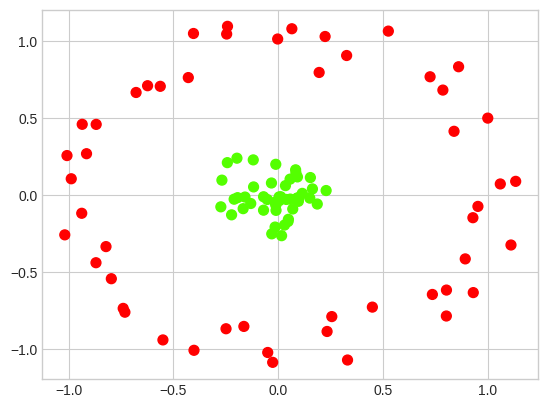

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')

In [4]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

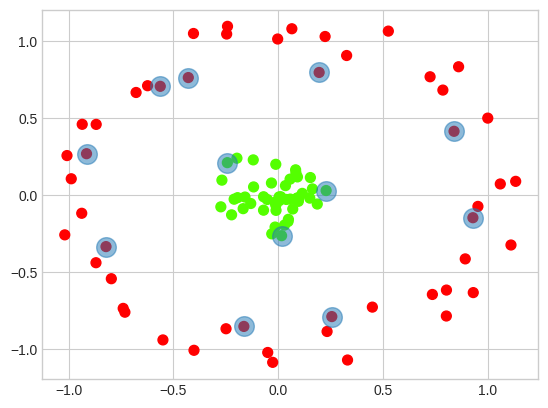

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=200, alpha=0.5);
plt.show()

In [6]:
clf.support_vectors_

array([[-0.56284252,  0.70818534],
       [-0.82193766, -0.33302761],
       [ 0.25597393, -0.78768918],
       [-0.42905802,  0.76499905],
       [ 0.83941958,  0.4159816 ],
       [-0.91487326,  0.27042204],
       [ 0.19551392,  0.79820568],
       [ 0.92947159, -0.14540502],
       [-0.16377912, -0.85156501],
       [-0.24269187,  0.21236157],
       [ 0.22884909,  0.03114996],
       [ 0.01624994, -0.26216124]])